In [121]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from scipy import stats
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [122]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
            )
crime_df = pd.read_csv(data_path, header=1, index_col=False, skiprows=[0, 1, 2], skipfooter=3)

#Clean up the column names
crime_df.columns=['City','Population', 'Violent crime', 'Murder', 'Rape revised', 'Rape legacy', 'Robbery', 
         'Aggravated assault','Property crime', 'Burglary', 'Larceny', 'Motor vehicle theft', 'Arson']

#Turn the Population strings into integers
crime_df['Population'] = crime_df['Population'].str.replace(',', '')
crime_df['Population'] = crime_df['Population'].astype(int)
#Turn the Robbery strings into integers
crime_df['Robbery'] = crime_df['Robbery'].str.replace(',', '')
crime_df['Robbery'] = crime_df['Robbery'].astype(int)
#Turn the Violent crime strings into integers
crime_df['Violent crime'] = crime_df['Violent crime'].str.replace(',', '')
crime_df['Violent crime'] = crime_df['Violent crime'].astype(int)
#Turn the Aggravated Assault strings into integers
crime_df['Aggravated assault'] = crime_df['Aggravated assault'].str.replace(',', '')
crime_df['Aggravated assault'] = crime_df['Aggravated assault'].astype(int)
#Turn the Property crime strings into integers
crime_df['Property crime'] = crime_df['Property crime'].str.replace(',', '')
crime_df['Property crime'] = crime_df['Property crime'].astype(int)
#Turn the Burglary strings into integers
crime_df['Burglary'] = crime_df['Burglary'].str.replace(',', '')
crime_df['Burglary'] = crime_df['Burglary'].astype(int)
#Turn the Larceny strings into integers
crime_df['Larceny'] = crime_df['Larceny'].str.replace(',', '')
crime_df['Larceny'] = crime_df['Larceny'].astype(int)
#Turn the Motor vehicle theft strings into integers
crime_df['Motor vehicle theft'] = crime_df['Motor vehicle theft'].str.replace(',', '')
crime_df['Motor vehicle theft'] = crime_df['Motor vehicle theft'].astype(int)

#Combine the Rape Scenarios into one category
crime_df['Rape legacy'] = crime_df['Rape legacy'].str.replace(',', '')
crime_df['Rape legacy'] = crime_df['Rape legacy'].astype(int)
crime_df['Rape revised'] = crime_df['Rape revised'].replace([None], 0).astype(int)
crime_df['Rape legacy'] = crime_df['Rape legacy'].replace([None], 0)
crime_df['Rape combined'] = crime_df['Rape revised'] + crime_df['Rape legacy']

crime_df['Arson'] = crime_df['Arson'].replace([None], 0).astype(int)

#Make Murder and Robbery binary
threshold = 1
crime_df['Murder binary'] = np.where(crime_df['Murder'] >= threshold, 1,0)
crime_df['Robbery binary'] = np.where(crime_df['Robbery'] >= threshold, 1, 0)

crime_df.head(500)

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson,Rape combined,Murder binary,Robbery binary
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,0,0,0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,0,0,0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,0,0,0
3,Albany,97956,791,8,0,30,227,526,4090,705,3243,142,0,30,1,1
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,3,0,1
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0,0,0,1
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0,0,0,0
7,Amherst Town,118296,107,1,0,7,31,68,2118,204,1882,32,3,7,1,1
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1,2,0,1
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0,0,0,1


In [123]:
#Double Check there is no missing data

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(crime_df.apply(num_missing, axis=0))

Missing values per column:
City                   0
Population             0
Violent crime          0
Murder                 0
Rape revised           0
Rape legacy            0
Robbery                0
Aggravated assault     0
Property crime         0
Burglary               0
Larceny                0
Motor vehicle theft    0
Arson                  0
Rape combined          0
Murder binary          0
Robbery binary         0
dtype: int64


In [124]:
#look at data for outliers
print(crime_df.describe())

       Population  Violent crime  Murder  Rape revised  Rape legacy   Robbery  \
count     348.000        348.000 348.000       348.000      348.000   348.000   
mean    40037.632        201.595   1.566         0.000        5.865    72.902   
std    450037.368       2815.269  18.304         0.000       60.425  1031.033   
min       526.000          0.000   0.000         0.000        0.000     0.000   
25%      3003.000          2.000   0.000         0.000        0.000     0.000   
50%      7233.500          6.000   0.000         0.000        0.000     1.000   
75%     18427.500         22.000   0.000         0.000        2.000     5.000   
max   8396126.000      52384.000 335.000         0.000     1112.000 19170.000   

       Aggravated assault  Property crime  Burglary    Larceny  \
count             348.000         348.000   348.000    348.000   
mean              121.261         792.606   119.684    637.017   
std              1706.132        7659.725   924.949   6346.054   
min   

In [125]:
#Something is putting our data out of whack. Let's sort and see
print(crime_df.sort_values('Population', ascending=False))

                         City  Population  Violent crime  Murder  \
216                  New York     8396126          52384     335   
35                    Buffalo      258789           3249      47   
272                 Rochester      210562           2107      42   
346                   Yonkers      199134           1036       6   
310                  Syracuse      143834           1192      21   
7                Amherst Town      118296            107       1   
3                      Albany       97956            791       8   
126               Greece Town       96667            151       0   
267               Ramapo Town       87204             57       2   
57            Clarkstown Town       80705             65       0   
214              New Rochelle       78800            175       0   
53           Cheektowaga Town       78361            158       0   
62               Colonie Town       78215             63       0   
206              Mount Vernon       68071       

In [126]:
#Let's Remove New York since it far outnumbers other data
crime_df = crime_df[crime_df.City != 'New York']

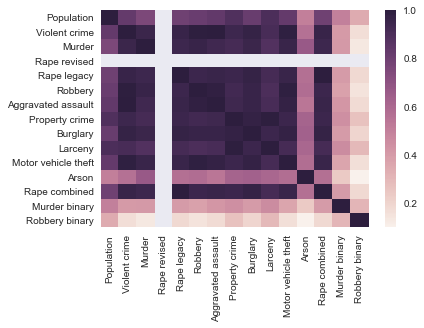

In [127]:
sns.heatmap(crime_df.corr())

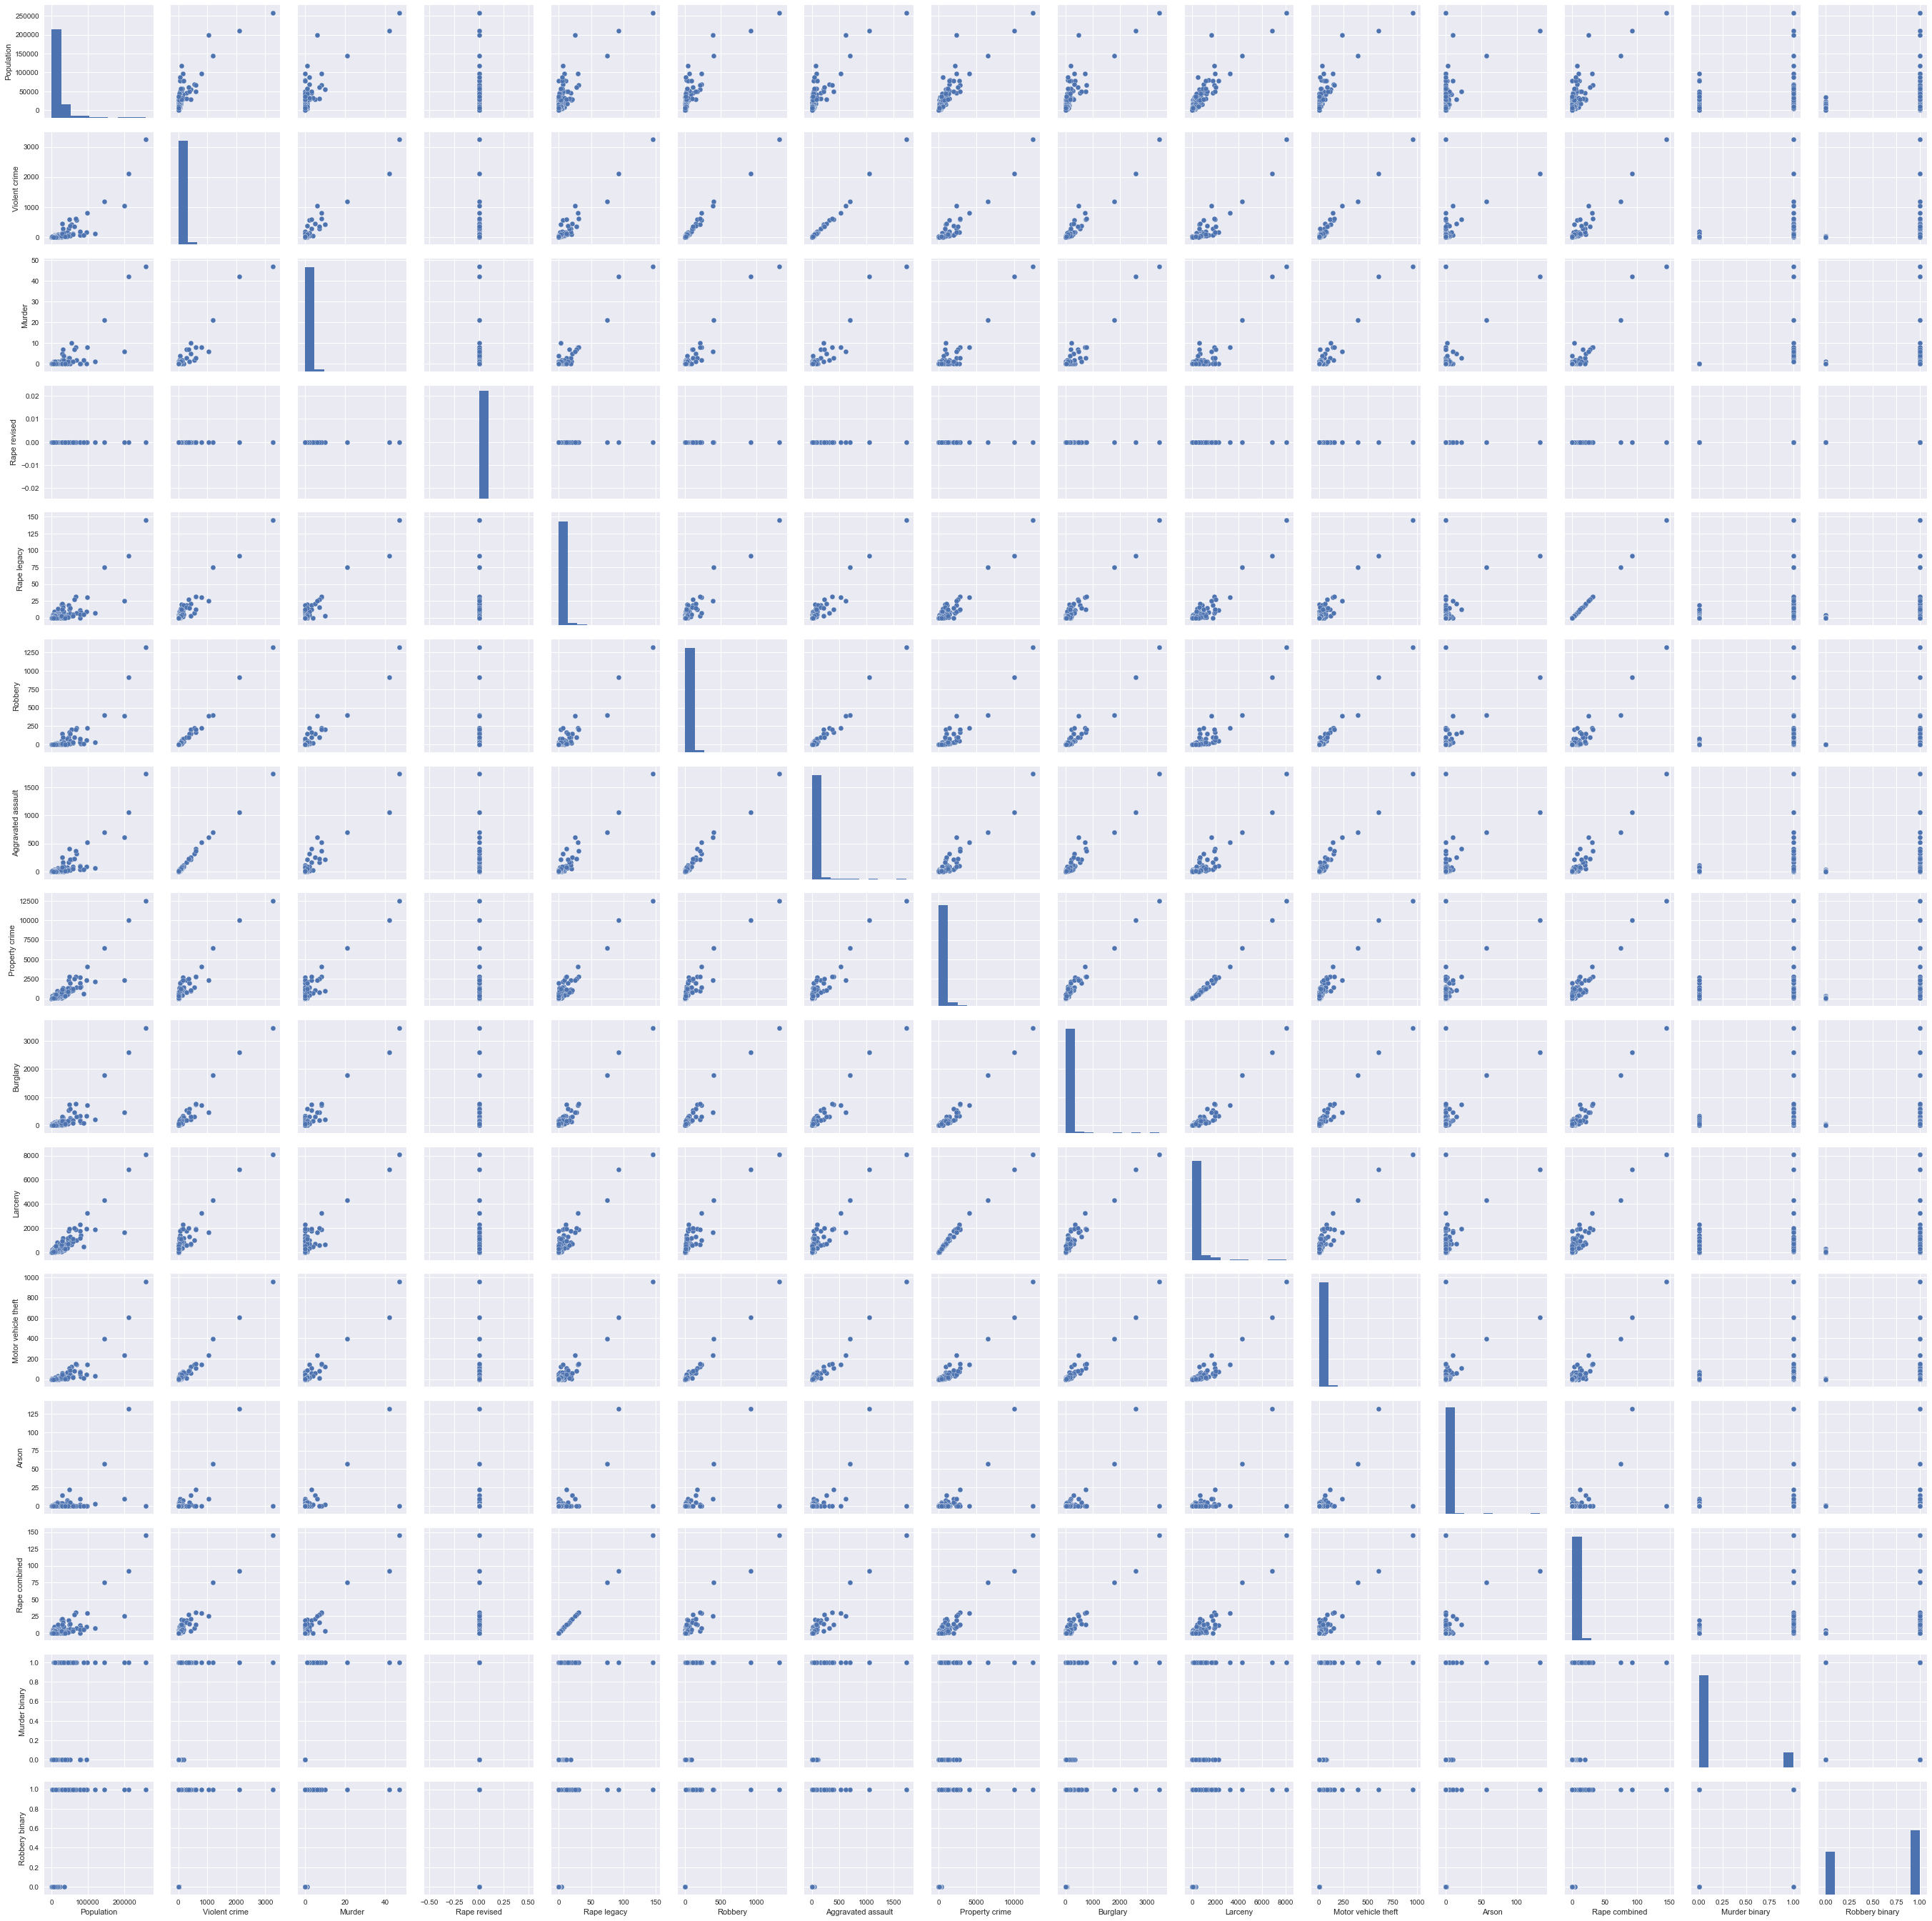

In [128]:
#A closer look at their relationships (linear?)
g = sns.pairplot(crime_df)

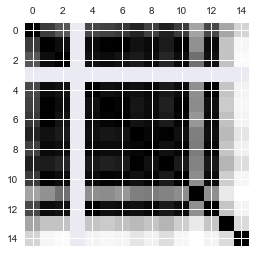

In [129]:
plt.matshow(crime_df.corr())

In [130]:
#Let's take a look at the R Square for each
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Population']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.03389004]]

Intercept: 
 [-155.02048926]

R-squared:
0.787222200252


In [131]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Violent crime']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4.12734676]]

Intercept: 
 [ 174.37729304]

R-squared:
0.891800824085


In [132]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 255.90303002]]

Intercept: 
 [ 230.88289249]

R-squared:
0.84113570003


In [133]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Rape combined']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 91.37351408]]

Intercept: 
 [ 141.12393493]

R-squared:
0.900286310393


In [134]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 10.16032199]]

Intercept: 
 [ 204.21326707]

R-squared:
0.8702811139


In [135]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Aggravated assault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 7.56558965]]

Intercept: 
 [ 158.30480899]

R-squared:
0.887266571811


In [136]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Burglary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.81281885]]

Intercept: 
 [ 110.5699272]

R-squared:
0.953763903665


In [137]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Larceny']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.43843736]]

Intercept: 
 [-44.33231884]

R-squared:
0.989293348046


In [138]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Arson']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 81.19887115]]

Intercept: 
 [ 303.8512827]

R-squared:
0.384186931449


In [139]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Motor vehicle theft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 14.5036548]]

Intercept: 
 [ 174.2161472]

R-squared:
0.900644194138


In [140]:
#Let's pick variables that are fairly independent of each other that provide a high R-Squared

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_df['Property crime'].values.reshape(-1, 1)
X = crime_df[['Population', 'Murder binary', 'Robbery binary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.43860764e-02   1.43473775e+01  -9.42521334e+01]]

Intercept: 
 [-108.42335403]

R-squared:
0.788942800091
